# PROYEK ANALISIS DATA

*   Nama: Nigel Alessandro
*   Email: nigelalessan@gmail.com
*   Id Dicoding: nigelalesssan





# PERTANYAAN BISNIS

- Bagaimana tren persewaan sepeda setiap musim dari tahun 2011 dan 2012?
- Bagaimana peningkatan persewaan sepeda dari tahun 2011 ke 2012?
- Bagaimana tingkat rata-rata sepeda yang disewa tiap harinya?



# Import Packages

In [1]:
# mount google drive untuk dapat mengakses google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# membuat direktori pada drive
!mkdir -p "/content/drive/My Drive/Belajar Analisis Data dengan Python"

In [3]:
# import library yang dibutuhkan
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Data Wrangling

# Gathering Data

In [4]:
# import dataset yang akan dianalisis
bike_day = pd.read_csv('/content/drive/My Drive/Belajar Analisis Data dengan Python/day.csv')
bike_day.head()
# informasi mengenai atribut terdapat pada ('/content/Readme.txt')

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [5]:
# import dataset yang akan dianalisis
bike_hour = pd.read_csv('/content/drive/My Drive/Belajar Analisis Data dengan Python/hour.csv')
bike_hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


# Assesing Data

In [6]:
# Melihat info dataset yang berupa kolom, jumlah non null dan tipe data
bike_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [7]:
# Melihat info dataset yang berupa kolom, jumlah non null dan tipe data
bike_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [8]:
# Melihat info dataset yang tidak memiliki nilai atau null
bike_day.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [9]:
# Melihat info dataset yang tidak memiliki nilai atau null

bike_hour.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [10]:
# Melihat apakah ada data yang memiliki nilai duplikat

bike_day.duplicated().sum()

0

In [11]:
# Melihat apakah ada data yang memiliki nilai duplikat

bike_hour.duplicated().sum()

0

# Cleaning Data

In [12]:
# Mengubah value kolom season menjadi string sesuai keterangan atribut pada (/content/Readme.txt)

bike_day['season'] = bike_day['season'].map({
    1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'
})

In [13]:
# Mengubah value kolom yr menjadi string sesuai keterangan atribut pada (/content/Readme.txt)
bike_day['yr'] = bike_day['yr'].map({
    0: '2011', 1: '2012'
})

In [14]:
# Mengubah value kolom mnth menjadi string sesuai keterangan atribut pada (/content/Readme.txt)
bike_day['mnth'] = bike_day['mnth'].map({
    1: 'Jan', 2: 'Feb', 3:'Mar', 4: 'April', 5: 'May', 6: 'Jun', 7: 'Jul',
    8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
})

In [15]:
# Mengubah value kolom weekday menjadi string sesuai keterangan atribut pada (/content/Readme.txt)
bike_day['weekday'] = bike_day['weekday'].map({
    0: 'Sun', 1: 'Mon', 2:'Tue', 3: 'Wed', 4: 'Thu', 5: 'Fri', 6: 'Sat'
    # "Sun": 0, "Mon": 1, "Tue": 2, "Wed": 3, "Thu": 4, "Fri" :5, "Sat" :6
})

In [16]:
# Mengubah value kolom workingday menjadi string sesuai keterangan atribut pada (/content/Readme.txt)
bike_day['workingday'] = bike_day['workingday'].map({
    0: 'Weekend/Holiday', 1: 'Weekday'
})

In [17]:
# mengubah menjadi tipe category
bike_day['season'] = bike_day.season.astype('category')
bike_day['yr'] = bike_day.yr.astype('category')
bike_day['mnth'] = bike_day.mnth.astype('category')
bike_day['weekday'] = bike_day.weekday.astype('category')
bike_day['workingday'] = bike_day.workingday.astype('category')

In [18]:
# melihat 5 data awal yang sudah dirubah pada dataset bike_day
bike_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Spring,2011,Jan,0,Sat,Weekend/Holiday,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Spring,2011,Jan,0,Sun,Weekend/Holiday,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,Spring,2011,Jan,0,Mon,Weekday,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,Spring,2011,Jan,0,Tue,Weekday,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,Spring,2011,Jan,0,Wed,Weekday,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


# Exploratory Data Analysis (EDA)

In [19]:
# Melihat statistik deskriptif dari dataset bike_day

bike_day.describe()

,instant,holiday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,0.028728,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,0.167155,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,0.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,0.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [20]:
# Melihat statistik deskriptif dari dataset bike_hour

bike_hour.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [21]:
# Melihat rata-rata sepeda yang disewa pertahunnya dari user registered dan user casual

bike_day.groupby(by="yr").agg({
    'registered' : 'mean',
    'casual' : 'mean'
})

<ipython-input-21-3af34dbd7c45>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bike_day.groupby(by="yr").agg({


,registered,casual
yr,,
2011,2728.358904,677.402740
2012,4581.450820,1018.483607


In [22]:
# Terjadi kenaikan registered users dan casual users dari tahun 2011 ke 2012

In [23]:
# melihat rata-rata sepeda yang disewa oleh user registered berdasarkan musim

bike_day.groupby(by="season").agg({
    'registered' : 'mean'
}).sort_values(by="registered", ascending=False)

<ipython-input-23-fcab0ec575ca>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bike_day.groupby(by="season").agg({


,registered
season,
Fall,4441.691489
Winter,3999.050562
Summer,3886.233696
Spring,2269.204420


In [24]:
# melihat rata-rata sepeda yang disewa oleh user casual berdasarkan musim

bike_day.groupby(by="season").agg({
    'casual' : 'mean'
}).sort_values(by="casual", ascending=False)

<ipython-input-24-d122a62f0f85>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bike_day.groupby(by="season").agg({


,casual
season,
Fall,1202.611702
Summer,1106.097826
Winter,729.112360
Spring,334.928177


In [25]:
# Jumlah sepeda yang disewa tinggi pada musim gugur baik pada registered users maupun casual users

# Data Visualization

# Bagaimana tren persewaan sepeda setiap musim dari tahun 2011 dan 2012?

<ipython-input-26-f2b23c017756>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  season_c = bike_day.groupby(by=["season","yr"]).agg({


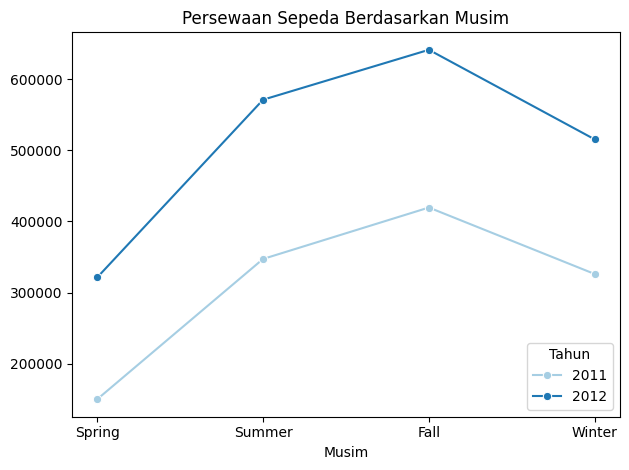

In [26]:
# membuat lineplot untuk menampilkan grafis total tingkat sewa sepeda berdasarkan musim pada tahun 2011 dan 2012

bike_day['season'] = pd.Categorical(bike_day['season'], categories=['Spring','Summer','Fall','Winter'], ordered=True)

season_c = bike_day.groupby(by=["season","yr"]).agg({
    "cnt": "sum"
}).reset_index()

sns.lineplot(
    data=season_c,
    x="season",
    y="cnt",
    hue="yr",
    palette="Paired",
    marker="o")

plt.title("Persewaan Sepeda Berdasarkan Musim")
plt.xlabel("Musim")
plt.ylabel(None)
plt.legend(title="Tahun", loc=4)
plt.tight_layout()
plt.style.use('bmh')
plt.show()

In [27]:
# menampilkan tabel jumlah sepeda yang disewa berdasarkan musim dan tahun

season_c.head(10)

,season,yr,cnt
0,Spring,2011,150000
1,Spring,2012,321348
2,Summer,2011,347316
3,Summer,2012,571273
4,Fall,2011,419650
5,Fall,2012,641479
6,Winter,2011,326137
7,Winter,2012,515476


# Bagaimana peningkatan persewaan sepeda dari tahun 2011 ke 2012?

<ipython-input-28-49b8ed03d6f9>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


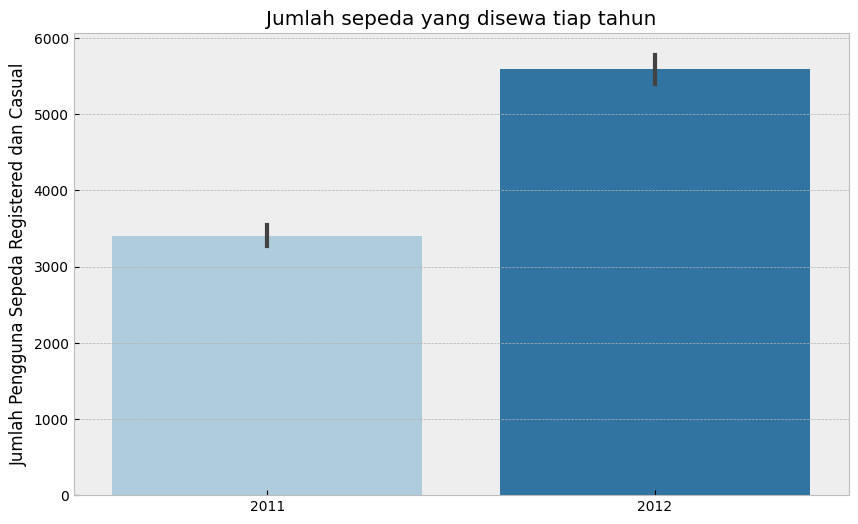

In [28]:
# menampilkan barplot jumlah sepeda yang disewa berdasarkan tahun

plt.figure(figsize=(10,6))
sns.barplot(
    x='yr',
    y='cnt',
    data=bike_day,
    order=['2011', '2012'],
    palette='Paired'
    )

plt.title('Jumlah sepeda yang disewa tiap tahun')
plt.xlabel(None)
plt.ylabel('Jumlah Pengguna Sepeda Registered dan Casual')
plt.style.use('bmh')
plt.show()

# Bagaimana tingkat rata-rata sepeda yang disewa tiap harinya?

<ipython-input-29-c11bb75cf94a>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = bike_day.groupby('weekday')[['registered', 'casual']].agg("mean").reset_index().round(2)


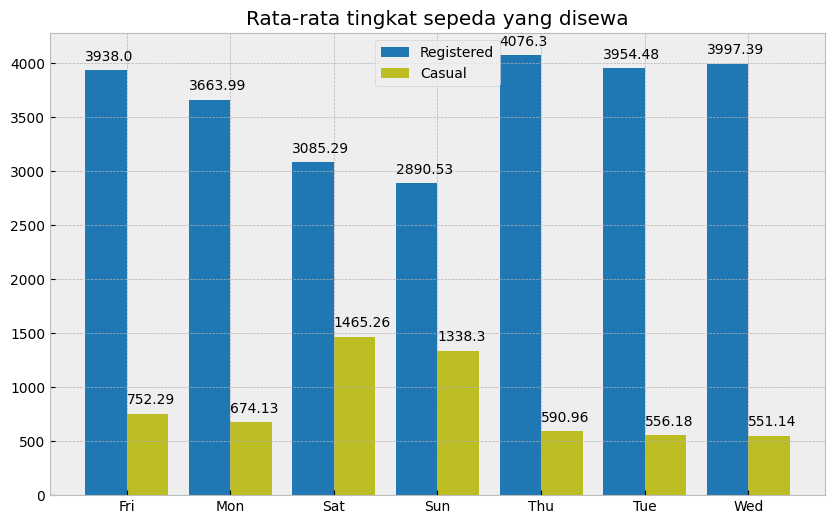

In [29]:
# membuat barchart rata-rata sepeda yang disewa tiap harinya baik dari user registered dan casual

grouped_data = bike_day.groupby('weekday')[['registered', 'casual']].agg("mean").reset_index().round(2)

label = ["Sun", "Mon", "Tue", "Wed", "Thu", "Fri", "Sat"]
x = np.arange(len(label))

plt.figure(figsize=(10, 6))

barwidth = 0.4

plt.bar(
    x-0.2,
    grouped_data['registered'],
    label='Registered',
    color='tab:blue',
    width = barwidth
)

plt.bar(
    x+0.2,
    grouped_data['casual'],
    label='Casual',
    color='tab:olive',
    width = barwidth
)

for i, v in enumerate(grouped_data['registered']):
  plt.text(i-0.40, v+90, str(v))

for i, v in enumerate(grouped_data['casual']):
  plt.text(i, v+90, str(v))



plt.style.use('bmh')
plt.xlabel(None)
plt.ylabel(None)
plt.title('Rata-rata tingkat sepeda yang disewa')
plt.xticks(x,('Fri','Mon', 'Sat', 'Sun', 'Thu', 'Tue', 'Wed'))
plt.legend()
plt.show()

In [30]:
# menampilkan tabel data rata-rata sepeda yang disewa tiap harinya
grouped_data.head(7)

,weekday,registered,casual
0,Fri,3938.00,752.29
1,Mon,3663.99,674.13
2,Sat,3085.29,1465.26
3,Sun,2890.53,1338.30
4,Thu,4076.30,590.96
5,Tue,3954.48,556.18
6,Wed,3997.39,551.14


# Conclusion



*   Dari pertanyaan pertama dapat disimpulkan bahwa selama 2 tahun berturut-turut dari tahun 2011 sampai tahun 2012 sewa tertinggi pada musim gugur atau Fall
*   Dari pertanyaan kedua dapat disimpulkan jika sewa sepeda mengalami peningkatan pada tahun 2011 ke 2012 dari pengguna registered dan casual
*   Dari pertanyaan ketiga dapat disimpulkan bahwa dari tahun 2011 dan 2012 rata-rata sewa sepeda tertinggi diduduki oleh hari kamis untuk registered user dan sabtu untuk casual user





In [31]:
bike_day.to_csv("bike_day.csv", index=False)